читаємо файл, читаємо таблицю

In [2]:
import pandas as pd

csv_url = "https://drive.google.com/uc?id=1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U"
df = pd.read_csv(csv_url)

# df
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначаємо розмір

In [3]:
df.shape

(8704, 25)

Визначаємо типи

In [4]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

частка пропусків в кожній колонці (використовуйте методи isnull та sum)

In [5]:
df.isnull().mean()

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

Видалення стовпців з пропусками, крім "Мова програмування"

In [6]:
target_column = 'Язык.программирования'

missing_columns = [column for column in df.columns if column != target_column and df[column].isna().any()]
df_cleaned = df.drop(missing_columns, axis=1)
df_cleaned

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,средний,12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,женский,22,Высшее,False,ниже среднего,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Днепр,свыше 1000 человек,Аутсорсинговая,мужской,34,Высшее,False,продвинутый,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


знову рахуємо, щоб підтвердити, що залишився тільки стовпець "Мова.програмування"

In [7]:
df_cleaned.isnull().mean()

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Еще.студент                         0.000000
Уровень.английского                 0.000000
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64

Видаляємо усі рядки вихідної таблиці через метод dropna

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   N                                 8704 non-null   int64  
 1   Должность                         8704 non-null   object 
 2   Язык.программирования             4854 non-null   object 
 3   Общий.опыт.работы                 8704 non-null   object 
 4   Опыт.работы.на.текущем.месте      8704 non-null   object 
 5   Зарплата.в.месяц                  8704 non-null   int64  
 6   Изменение.зарплаты.за.12.месяцев  8704 non-null   int64  
 7   Город                             8704 non-null   object 
 8   Размер.компании                   8704 non-null   object 
 9   Тип.компании                      8704 non-null   object 
 10  Пол                               8704 non-null   object 
 11  Возраст                           8704 non-null   int64  
 12  Образо

In [9]:
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


In [10]:
df_cleaned = df.dropna()
df_cleaned
# df_1 = df_cleaned.dropna()
# df_1

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls


новий розмір тепер

In [11]:
df_cleaned.shape

(0, 25)

нова таблиця python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [12]:
programming_language = 'Python'
python_data = df[df['Язык.программирования'] == programming_language]
python_data

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,до 1000 человек,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,до 50 человек,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,свыше 1000 человек,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,до 50 человек,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


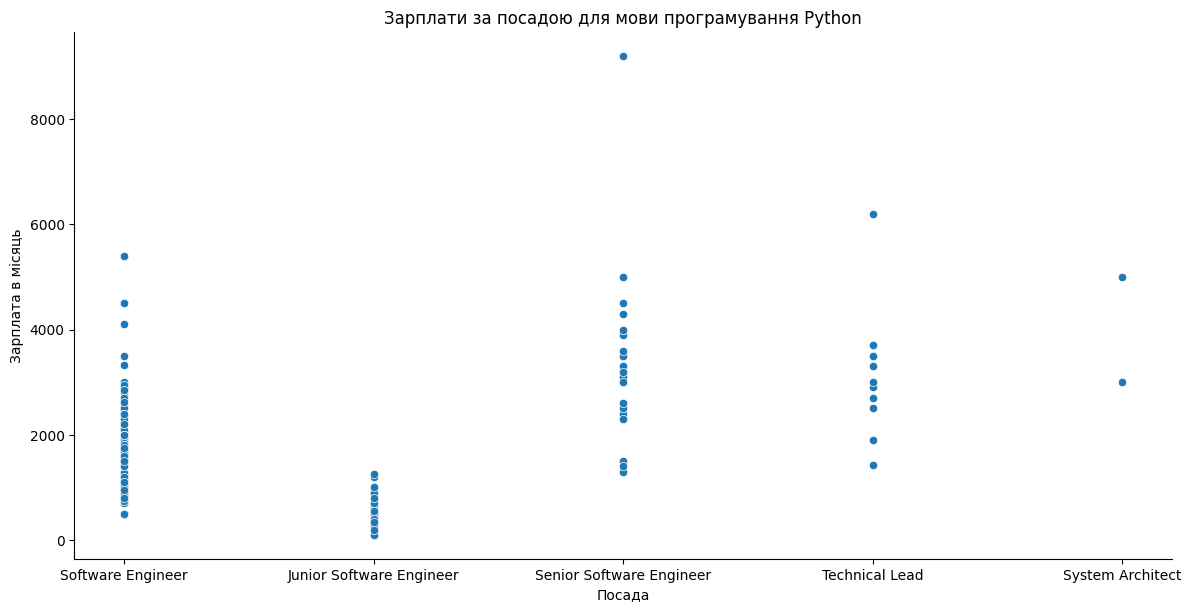

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

salary_column = 'Зарплата.в.месяц'
sns.relplot(x='Должность', y=salary_column, kind='scatter', data=python_data, height=6, aspect=2)

plt.title(f'Зарплати за посадою для мови програмування {programming_language}')
plt.xlabel('Посада')
plt.ylabel('Зарплата в місяць')
plt.show()

Визначаємо розмір

In [13]:
python_data.shape

(207, 25)

методом groupby, групуємо за стовпчиком "Посада"

In [14]:
grouped_data = python_data.groupby('Должность').size().reset_index(name='Кількість')
grouped_data

,Должность,Кількість
0,Junior Software Engineer,63
1,Senior Software Engineer,31
2,Software Engineer,100
3,System Architect,2
4,Technical Lead,11


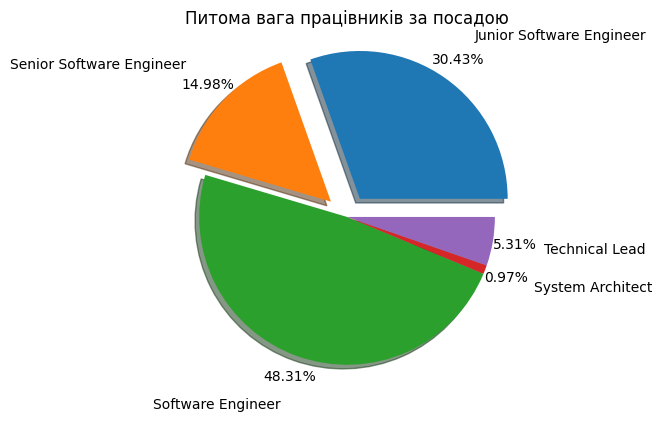

In [50]:
import matplotlib.pyplot as plt

grouped_data = python_data.groupby('Должность').size().reset_index(name='Кількість')
grouped_data

labels = grouped_data['Должность']
data = grouped_data['Кількість']
explode = [0.15, 0.15, 0, 0, 0]

plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.title('Питома вага працівників за посадою')
plt.show()


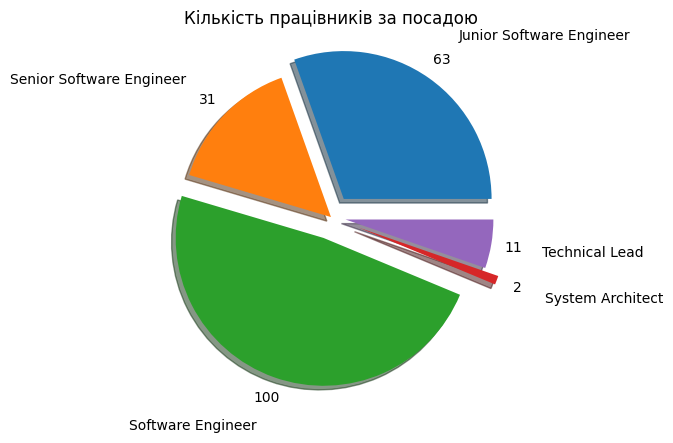

In [49]:
grouped_data = python_data.groupby('Должность').size().reset_index(name='Кількість')

labels = grouped_data['Должность']
data = grouped_data['Кількість']
explode = [0.15, 0, 0.15, 0.2, 0.1]

plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100),
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.title('Кількість працівників за посадою')
plt.show()


 агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [19]:
grouped_data = python_data.groupby('Должность')['Зарплата.в.месяц'].agg(['min', 'max']).reset_index()
grouped_data

,Должность,min,max
0,Junior Software Engineer,100,1250
1,Senior Software Engineer,1300,9200
2,Software Engineer,500,5400
3,System Architect,3000,5000
4,Technical Lead,1425,6200


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [29]:
def fill_avg_salary(row):
    if pd.notna(row['Зарплата.в.месяц']):
        return row['Зарплата.в.месяц']
    else:
        return row['Зарплата.в.месяц'].mean()

grouped_data['avg'] = df.apply(fill_avg_salary, axis=1)

# df['avg'] = df.apply(fill_avg_salary, axis=1)
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls,avg
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA,400
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA,430
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV,2500
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV,2000
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA,700
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN,400
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV,800
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM,2600


Створення описовї статистику за допомогою методу describe для нового стовпчика (варіант 1)

In [30]:
avg_stats = grouped_data['avg'].describe()
avg_stats

count       5.000000
mean     1966.000000
std      1696.991455
min       400.000000
25%       430.000000
50%      2000.000000
75%      2500.000000
max      4500.000000
Name: avg, dtype: float64

Збережіть отриману таблицю в CSV файл

In [63]:
from google.colab import drive
from datetime import datetime

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

drive.mount('/content/drive')
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/group_db_{current_time}.csv', index=False)


Mounted at /content/drive


середня заробітна плата для мови програмування Python

In [52]:
python_data = df[df['Язык.программирования'] == 'Python']
grouped_data = python_data.groupby(['Должность', 'Язык.программирования'])['Зарплата.в.месяц'].agg(['min', 'max', 'mean']).reset_index()
grouped_data = grouped_data.round({'mean': 0})
grouped_data = grouped_data.rename(columns={'mean': 'avg'})

grouped_data

,Должность,Язык.программирования,min,max,avg
0,Junior Software Engineer,Python,100,1250,561.0
1,Senior Software Engineer,Python,1300,9200,3387.0
2,Software Engineer,Python,500,5400,1799.0
3,System Architect,Python,3000,5000,4000.0
4,Technical Lead,Python,1425,6200,3166.0


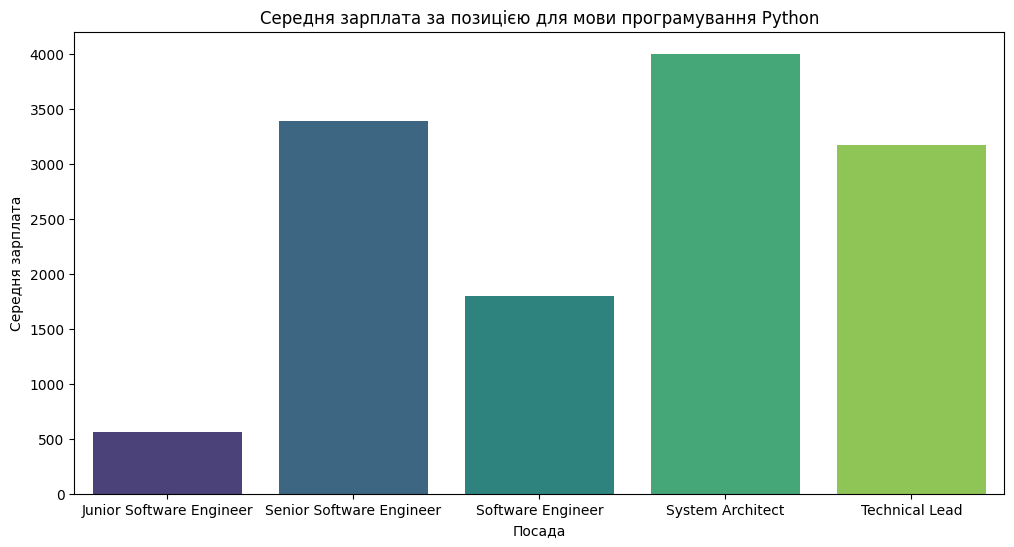

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Должность', y='avg', data=grouped_data, palette='viridis')

plt.title('Середня зарплата за позицією для мови програмування Python')
plt.xlabel('Посада')
plt.ylabel('Середня зарплата')

plt.show()


Створення описовї статистику за допомогою методу describe для нового стовпчика

In [33]:
avg_stats = grouped_data['avg'].describe()
avg_stats

count       5.00000
mean     2582.60000
std      1387.20341
min       561.00000
25%      1799.00000
50%      3166.00000
75%      3387.00000
max      4000.00000
Name: avg, dtype: float64

In [64]:
from google.colab import drive

drive.mount('/content/drive')
grouped_data.to_csv('/content/drive/MyDrive/Colab Notebooks/grouped_data.csv', index=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
